In [5]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Activation, Reshape, UpSampling2D, Flatten, Dense
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot


# Multilayer Fully-connected Neural Network

In [ ]:
visible = Input(shape=(10,))
hidden1 = Dense(10, activation='relu')(visible)
hidden2 = Dense(20, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)
model = Model(inputs=visible, outputs=output)
# summarize layers
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True, rankdir='TB').create(prog='dot', format='svg'))


In [ ]:
visible = Input(shape=(64,64,1))
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(16, kernel_size=4, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
hidden1 = Dense(10, activation='relu')(pool2)
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)
# summarize layers
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True, rankdir='TB').create(prog='dot', format='svg'))


# Shared Input Layer

In [ ]:
from keras.layers.merge import concatenate
from keras.layers import Flatten
# input layer
visible = Input(shape=(64,64,1))
# first feature extractor
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
flat1 = Flatten()(pool1)
# second feature extractor
conv2 = Conv2D(16, kernel_size=8, activation='relu')(visible)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat2 = Flatten()(pool2)
# merge feature extractors
merge = concatenate([flat1, flat2])
# interpretation layer
hidden1 = Dense(10, activation='relu')(merge)
# prediction output
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True, rankdir='TB').create(prog='dot', format='svg'))


# Shared Feature Extraction

In [ ]:
# define input
visible = Input(shape=(100,1))
# feature extraction
extract1 = Dense(10)(visible)
# first interpretation model
interp1 = Dense(10, activation='relu')(extract1)
# second interpretation model
interp11 = Dense(10, activation='relu')(extract1)
interp12 = Dense(20, activation='relu')(interp11)
interp13 = Dense(10, activation='relu')(interp12)
# merge interpretation
merge = concatenate([interp1, interp13])
# output
output = Dense(1, activation='sigmoid')(merge)
model = Model(inputs=visible, outputs=output)
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True, rankdir='TB').create(prog='dot', format='svg'))


# Multiple Input

In [ ]:
visible1 = Input(shape=(64,64,1))
conv11 = Conv2D(32, kernel_size=4, activation='relu')(visible1)
pool11 = MaxPooling2D(pool_size=(2, 2))(conv11)
conv12 = Conv2D(16, kernel_size=4, activation='relu')(pool11)
pool12 = MaxPooling2D(pool_size=(2, 2))(conv12)
flat1 = Flatten()(pool12)
# second input model
visible2 = Input(shape=(32,32,3))
conv21 = Conv2D(32, kernel_size=4, activation='relu')(visible2)
pool21 = MaxPooling2D(pool_size=(2, 2))(conv21)
conv22 = Conv2D(16, kernel_size=4, activation='relu')(pool21)
pool22 = MaxPooling2D(pool_size=(2, 2))(conv22)
flat2 = Flatten()(pool22)
# merge input models
merge = concatenate([flat1, flat2])
# interpretation model
hidden1 = Dense(10, activation='relu')(merge)
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=[visible1, visible2], outputs=output)
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True, rankdir='TB').create(prog='dot', format='svg'))


# Multiple Output

In [ ]:
from keras.layers.recurrent import LSTM
from keras.layers.wrappers import TimeDistributed
# input layer
visible = Input(shape=(100,1))
# feature extraction
extract = LSTM(10, return_sequences=True)(visible)
# classification output
class11 = LSTM(10)(extract)
class12 = Dense(10, activation='relu')(class11)
output1 = Dense(1, activation='sigmoid')(class12)
# sequence output
output2 = TimeDistributed(Dense(1, activation='linear'))(extract)
# output
model = Model(inputs=visible, outputs=[output1, output2])
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True, rankdir='TB').create(prog='dot', format='svg'))


# Siamese

In [6]:
imDim = 64
input_shape  = (imDim,imDim,1)
inp_img = Input(shape = (imDim,imDim,1), name = 'ImageInput')
model = inp_img

#     model = Input(shape=(imDim,imDim,1))
#     model.add(Input(shape = (imDim,imDim,1), name = 'FeatureNet_ImageInput'))
model = Conv2D(32,kernel_size=(3, 3),activation='relu',input_shape=input_shape,padding='valid')(model)
#     model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model = MaxPooling2D((2,2), padding='valid')(model)
model = Conv2D(64, (3, 3), activation='relu',padding='valid')(model)
#     model.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
model = MaxPooling2D((2,2),padding='valid')(model)
#     model.add(Conv2D(16, (3, 3), activation='relu',padding='same'))
model = Conv2D(128, (3, 3), activation='relu',padding='valid')(model)
model = MaxPooling2D((2,2),padding='valid')(model)
#     model.add(Conv2D(1, (3, 3), activation='relu',padding='same'))
#     model.add(Conv2D(2, (3, 3), activation='relu',padding='same'))

model = Conv2D(256, (1, 1), activation='relu',padding='valid')(model)
model = MaxPooling2D((2,2),padding='valid')(model)

model = Conv2D(64, (1, 1), activation='relu',padding='valid')(model)
# model = MaxPooling2D((2,2),padding='valid')(model)
model = Flatten()(model)

# img_in = np.array((-1,imDim,imDim,1), dtype='float32')
# img_in = tf.placeholder(shape=(imDim,imDim,1), dtype='float32')

feat = Model(inputs=[inp_img], outputs=[model],name = 'Feat_Model')
feat.summary()


# In[27]:

left_img = Input(shape = (imDim,imDim,1), name = 'left_img')
right_img = Input(shape = (imDim,imDim,1), name = 'right_img')


# In[28]:

left_feats = feat(left_img)
right_feats = feat(right_img)


# In[35]:

from keras.layers import concatenate
import random


# In[36]:

merged_feats = concatenate([left_feats, right_feats], name = 'concat_feats')
merged_feats = Dense(1024, activation = 'linear')(merged_feats)
merged_feats = BatchNormalization()(merged_feats)
merged_feats = Activation('relu')(merged_feats)
merged_feats = Dense(4, activation = 'linear')(merged_feats)
merged_feats = BatchNormalization()(merged_feats)
merged_feats = Activation('relu')(merged_feats)
merged_feats = Dense(1, activation = 'sigmoid')(merged_feats)
similarity_model = Model(inputs = [left_img, right_img], outputs = [merged_feats], name = 'Similarity_Model')
similarity_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ImageInput (InputLayer)      (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 128)         0         
__________

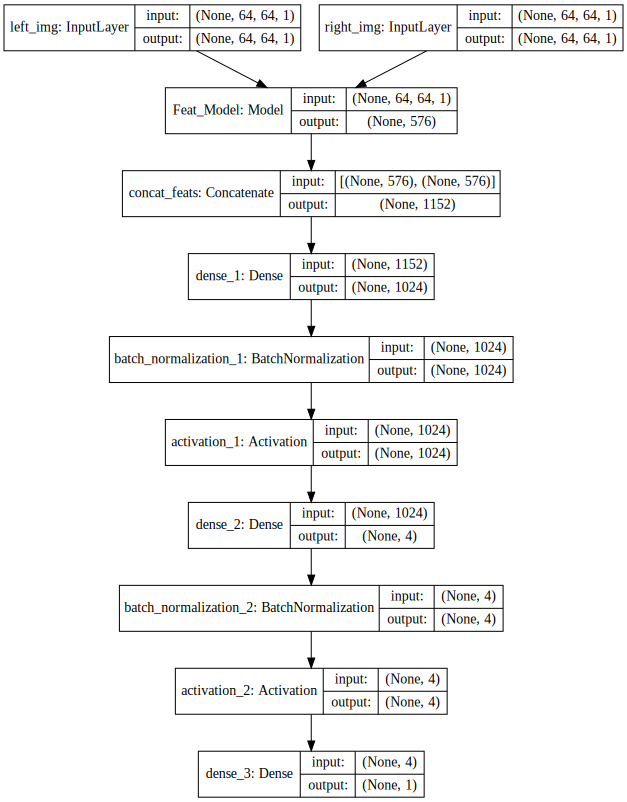

In [8]:
display(SVG(model_to_dot(similarity_model, show_layer_names=True, show_shapes=True, rankdir='TB').create(prog='dot', format='svg')))


In [ ]:

display(SVG(model_to_dot(similarity_model, show_layer_names=True, show_shapes=True, rankdir='TB').create(prog='dot', format='svg')))


# Autoencoder

In [1]:
input_img = Input(shape=(64, 64, 1))  # adapt this if using `channels_first` image data format
# x = CoordinateChannel2D()(input_img)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
# x = CoordinateChannel2D()(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
# x = CoordinateChannel2D()(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
encoded = Flatten()(x)
encoded = Dense(8*8*8, activation='relu', name='latent')(encoded)
# model = Model(input_img,encoded)
# print(model.summary())
# at this point the representation is (4, 4, 8) i.e. 128-dimensional
r = Reshape(target_shape=(8,8,8))(encoded)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(r)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same',name='output')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

NameError: name 'Input' is not defined

In [ ]:

display(SVG(model_to_dot(autoencoder, show_layer_names=True, show_shapes=True, rankdir='TB').create(prog='dot', format='svg')))


In [ ]:
encoder = Model(autoencoder.inputs, autoencoder.get_layer('latent').output)
encoder.summary()

# What to do with latent features?
- Use latent features to explore euclidean, cosine distances